Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None

Missing Values:
Brand                   9705
Material                8347
Size                    6595
Laptop Compartment      744

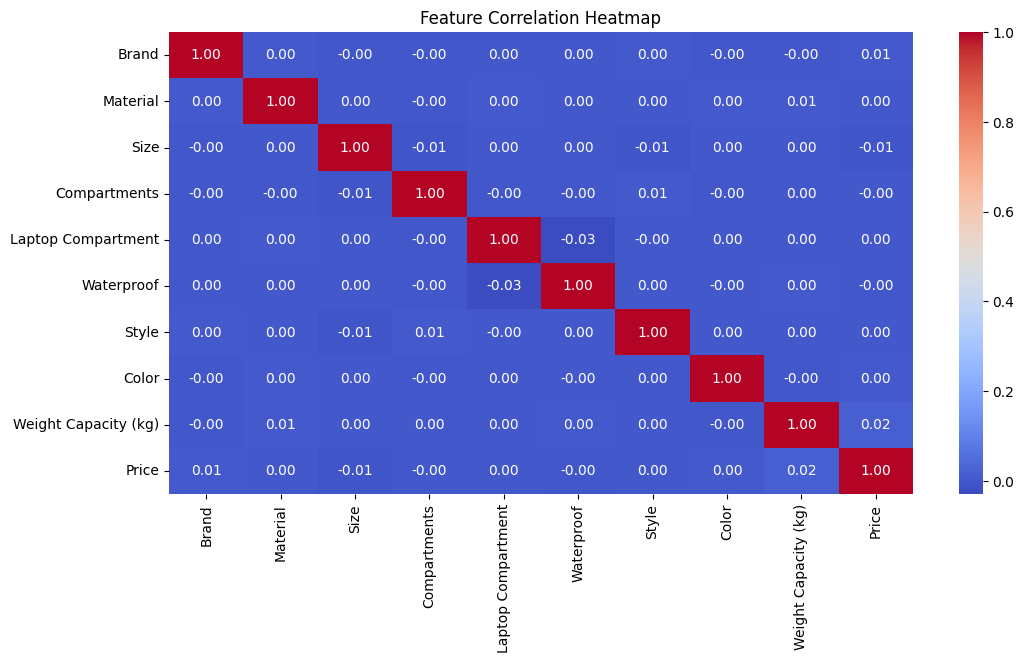

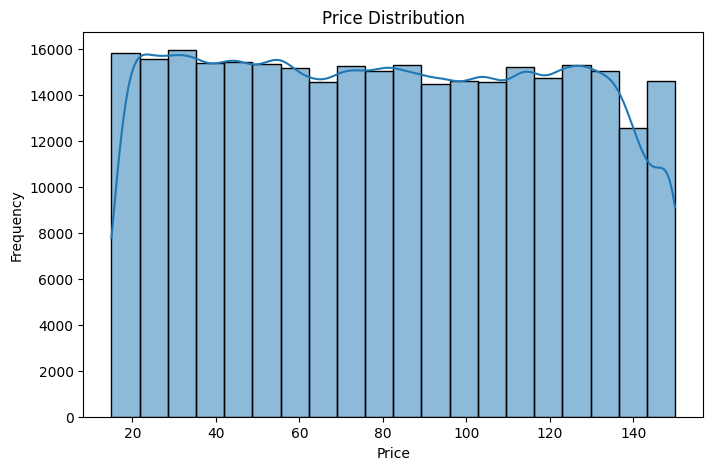

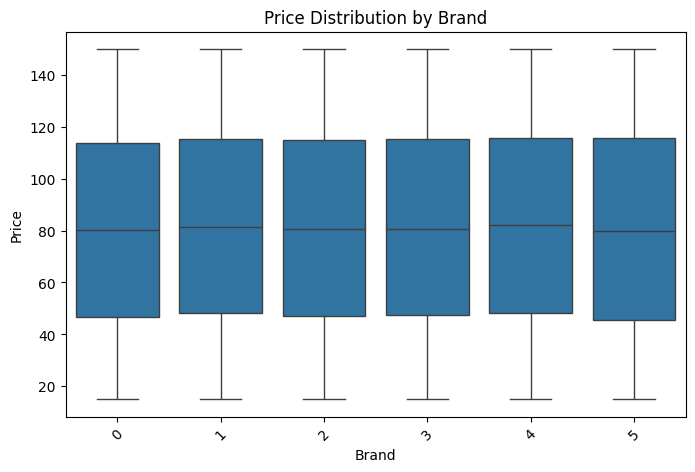

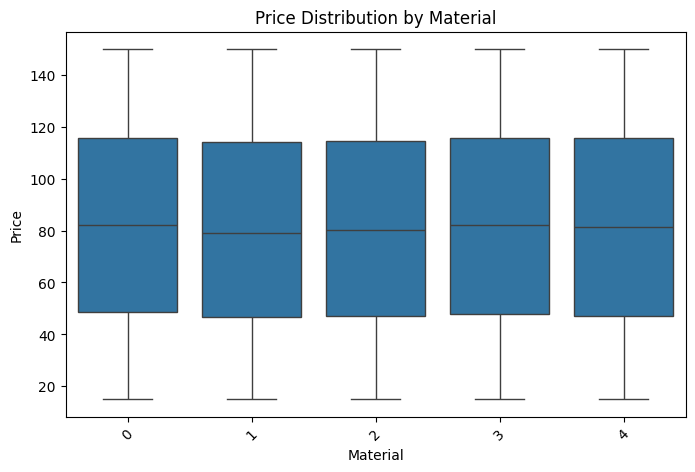

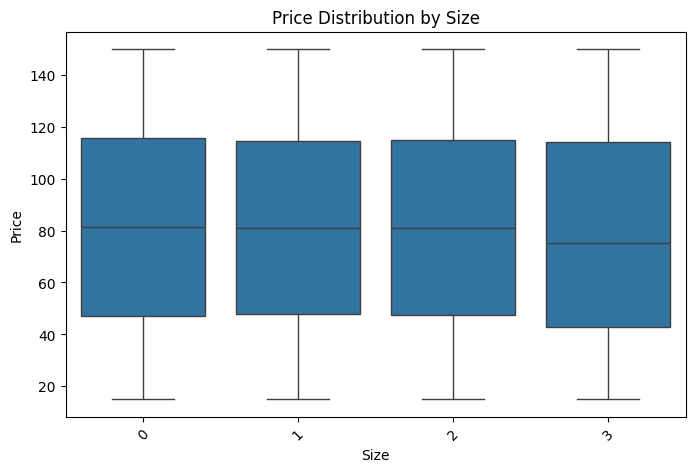

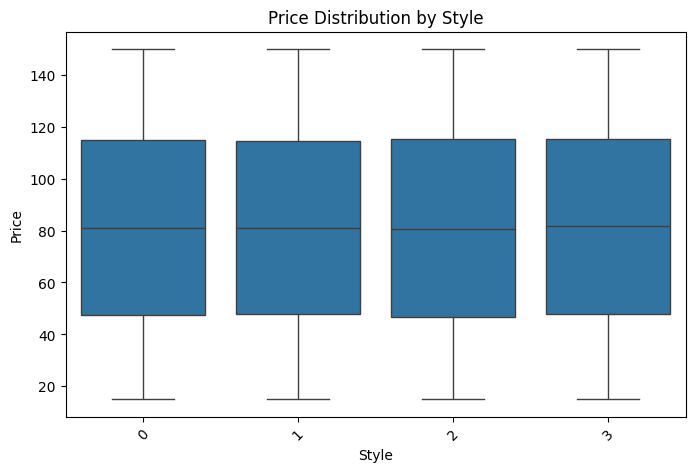

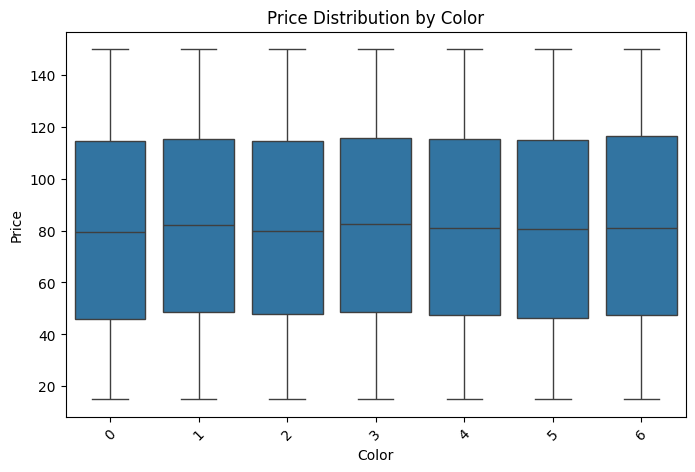

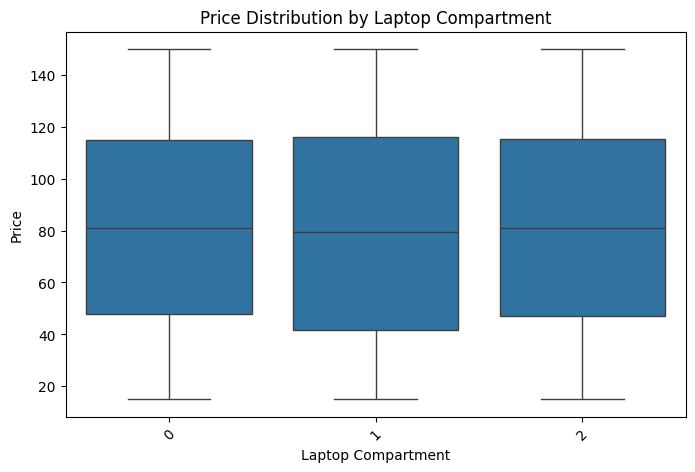

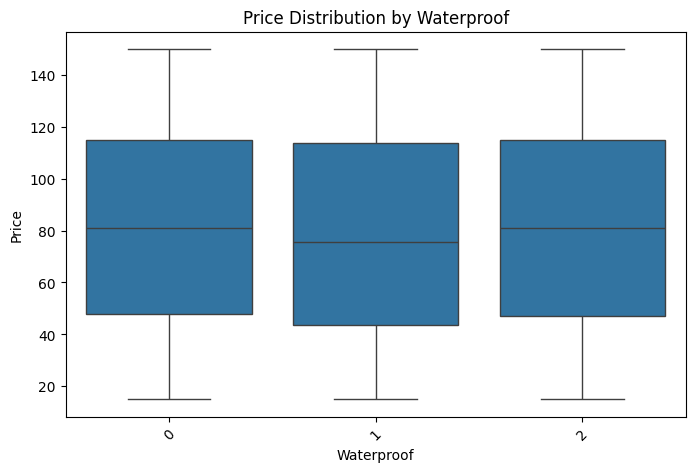

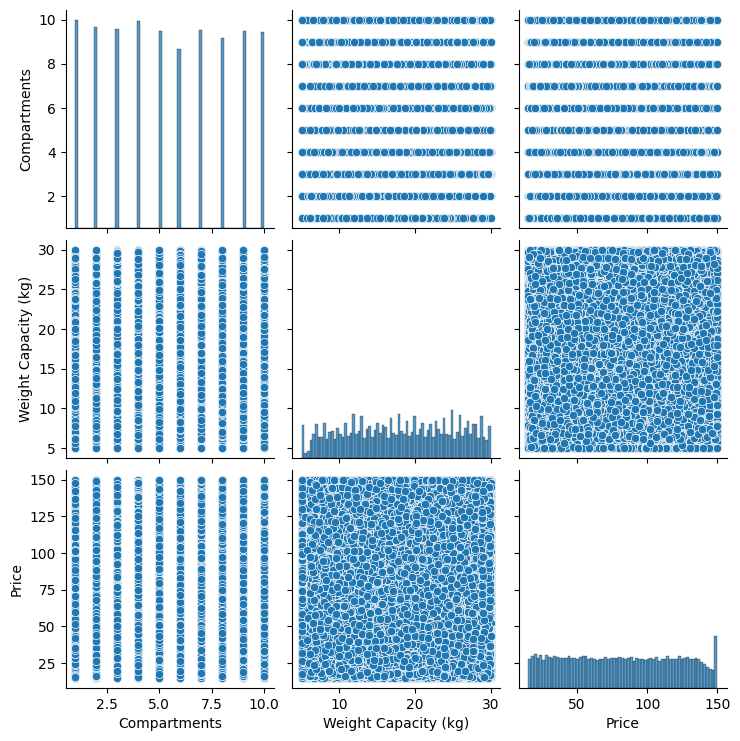

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv("train.csv")

# Display dataset info
print("Dataset Info:")
print(train_df.info())

# Check for missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Drop 'id' if it's not needed
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

# Identify categorical and numerical columns
categorical_cols = ['Brand', 'Material', 'Size', 'Style', 'Color', 'Laptop Compartment', 'Waterproof']
numerical_cols = [col for col in train_df.columns if col not in categorical_cols + ['Price']]

# Fill missing categorical values with 'Unknown'
train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown')

# Encode categorical variables
for col in categorical_cols:
    train_df[col] = train_df[col].astype("category").cat.codes

# Fill missing numerical values with mean
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].mean())

# Display summary statistics
print("\nSummary Statistics:")
print(train_df.describe())

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(train_df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot for categorical variables vs Price
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_df[col], y=train_df["Price"])
    plt.xticks(rotation=45)
    plt.title(f"Price Distribution by {col}")
    plt.show()

# Pairplot for numerical features
sns.pairplot(train_df, vars=numerical_cols + ["Price"])
plt.show()
